In [127]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'


# Project Summary: Google Stock Data Analysis

This section provides a concise summary of the analysis conducted on Google stock data (`Google_Stock_data`) from 2020 to 2025. Current date and time: 05:04 PM BST, Tuesday, July 01, 2025.

## Overview

The project explored various aspects of Google stock (GOOGL) data, including price distributions, volume patterns, correlations, and predictive modeling, using visualizations and statistical methods.

## Key Findings

- **Data Loading and Display**: The dataset was successfully loaded, with display settings adjusted to show all rows, columns, and a wide format for clarity.  
- **Volume Distribution**: A right-skewed histogram revealed most trading volumes cluster between 0.2 and 0.4 (in 1e8 units), with rare high-volume events above 1.0, confirmed by a balanced bin count of 230–250 per quantile.  
- **Correlation Analysis**: A heatmap showed perfect correlations (1.0) among price metrics (Open, High, Low, Close, Adj Close), with a weak negative correlation (-0.33 to -0.35) with volume, suggesting minor inverse price-volume dynamics.  
- **Predictive Modeling**: A linear regression model using Open, High, Low, and Volume as features predicted Close prices with an R² score of 0.9994, indicating near-perfect accuracy, as visualized in a scatter plot of actual vs. predicted values.

## Interpretations

- The uniform price correlations highlight the consistency of daily price data.  
- The skewed volume distribution points to typical low-volume days with occasional spikes, possibly linked to market events.  
- The high R² score reflects a robust model, though its reliance on highly correlated features suggests potential overfitting, warranting further testing.

## Applications

- Insights can inform trading strategies, risk assessment, and anomaly detection.  
- The predictive model could be refined for real-time forecasting, while volume patterns aid in identifying significant trading days.

## Conclusion

This analysis provides a comprehensive view of Google stock behavior, from data distribution to accurate price prediction. Future work could explore external factors (e.g., news events) or test the model on new data to enhance reliability.

In [128]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

Google_Stock_data = pd.read_csv(
    r"C:\Users\User\Desktop\Google Stock Price Data (2020-2025)  GOOGL\googl_data_2020_2025.csv",
    sep=',',
    on_bad_lines='skip'
)
Google_Stock_data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


### 📊 Loading and Displaying Google Stock Data (2020–2025)

This section of the project focuses on importing and configuring the display of Google stock data using the Pandas library.

- First, the display settings of Pandas are adjusted to ensure that the entire DataFrame (all rows and columns) is visible in the output, preventing truncation or wrapping of long rows.

- Next, a CSV file containing historical stock prices for Google (GOOGL) from 2020 to 2025 is read into a DataFrame. The file path is specified locally, and any bad lines in the CSV (e.g., corrupted rows) are skipped during import.

- Finally, the first few rows of the dataset are displayed to give a quick overview of its structure and content.


In [129]:
Google_Stock_data.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
1255,2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
1256,2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
1257,2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700
1259,2024-12-31 00:00:00+00:00,189.3000031,189.3000031,191.9600067,188.5099945,191.0800018,17466900


### 📉 Viewing the Last Entries of the Dataset

After loading the dataset, the last few rows are displayed to inspect the most recent records.

This helps verify the completeness of the data, check for trailing null values, and understand how the dataset ends — especially useful when working with time series data such as stock prices.


In [130]:
Google_Stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


### 🧠 Dataset Structure Overview

The dataset’s structure and metadata are examined to understand its composition.

Using this step, we can:

- View the number of entries (rows) and columns in the dataset.
- See the name and data type of each column (e.g., float, int, object).
- Identify how many non-null values exist in each column — helping detect missing data.
- Get an overall sense of memory usage.

This is a crucial diagnostic step before performing any data cleaning or analysis.


In [131]:
Google_Stock_data.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,2024-12-31 00:00:00+00:00,105.5872421,105.9700012,138,138.8999939,119.2399979,22288000
freq,1,3,3,3,2,3,3


### 📊 Statistical Summary of the Dataset

This step provides a statistical overview of the numerical columns in the dataset.

It includes key descriptive statistics such as:

- **Count** – Total number of non-null values per column  
- **Mean** – Average value  
- **Standard Deviation (std)** – Spread or variability of the data  
- **Minimum (min)** and **Maximum (max)** values  
- **25%**, **50% (median)**, and **75%** percentiles

These statistics are useful for understanding the distribution, central tendency, and potential outliers in the dataset — essential for data exploration and preprocessing.


In [132]:
Google_Stock_data.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [133]:
Google_Stock_data.isnull().sum()

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64

In [134]:
Google_Stock_data.dtypes

Price        object
Adj Close    object
Close        object
High         object
Low          object
Open         object
Volume       object
dtype: object

In [135]:

numric_coulmns = ["Price", "Adj Close", "Close", "High", "Low", "Open", "Volume"]


# tabdil data be adadi ha va hazf ","az toosh
for col in numric_coulmns:
    Google_Stock_data[col] = pd.to_numeric(Google_Stock_data[col].astype(str).str.replace(',',""),errors="coerce")

## por kardan dade hateye NaN ba miane 
## elat ine roo outlear tasir kamtaridare
for col in numric_coulmns:
    if Google_Stock_data[col].isna().sum()>0:
        Google_Stock_data[col] = Google_Stock_data[col].fillna(Google_Stock_data[col].median())
Google_Stock_data.dtypes

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice



Price        float64
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

### 🧼 Data Cleaning and Type Conversion

This step focuses on cleaning and preparing the numeric columns in the dataset for analysis.

- **Conversion to Numeric Format:**  
  Certain numeric values (like prices or volume) might be stored as strings due to the presence of commas (`,`) as thousands separators. Each specified column is converted to a proper numeric type by first removing commas and then coercing any non-convertible values to `NaN`.

- **Handling Missing Values:**  
  After conversion, any resulting `NaN` values are handled. For each column with missing data, the `NaN` values are replaced with the **median** of that column rather than the mean.  
  Using the median reduces the impact of **outliers** and provides a more robust fill strategy for financial data.

- **Data Type Verification:**  
  The data types of all columns are checked to ensure correct conversion and readiness for further analysis.


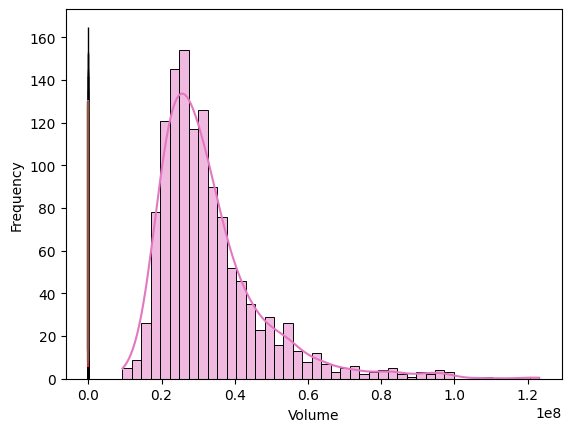

In [136]:
for col in numric_coulmns:
    plt.Figure(figsize=(8,4))
    sns.histplot(Google_Stock_data[col],kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show

# Analysis of Google Stock Volume Histogram

This section provides a detailed analysis of the histogram representing the trading volume of Google stock (based on potential `Google_Stock_data`) and explains the results.

## Histogram Description

- **Axes**:  
  - X-axis: Trading volume (Volume) in units of 1e8 (likely 100 million units), ranging from 0 to 1.2.  
  - Y-axis: Frequency (number of occurrences) from 0 to 160, indicating how often each volume value occurs.  

- **Data Visualization**:  
  - Pink bars represent the frequency distribution of trading volumes.  
  - A pink curve overlaying the bars is likely a kernel density estimation (KDE), smoothing the data trend.  
  - A vertical brown line near zero might indicate the mean or median volume, though its exact meaning is unclear without additional data.  

- **Data Distribution**:  
  - The distribution is strongly right-skewed (right-skewed).  
  - The peak frequency (over 140) occurs between volumes 0.2 and 0.4, representing the most common trading volume.  
  - Frequency drops sharply after 0.6 and is nearly zero above 1.0, indicating rare high-volume occurrences.

## What It Represents

This histogram displays the distribution of daily trading volumes for Google stock (GOOGL) from 2020 to 2025. The right-skewed nature suggests that most trades have low volumes, while high-volume events (e.g., earnings announcements or market volatility) are infrequent.

## Results and Interpretation

- **Right-Skewness**: The data is dominated by low volumes (0.2 to 0.4), with high volumes (above 1.0) appearing as potential outliers.  
- **Peak Frequency**: Volumes between 0.2 and 0.4 reflect typical market activity for Google stock.  
- **Long Tail**: Volumes above 1.0 are rare and may correlate with significant events (e.g., major news).  
- **Application**: This pattern can be used for anomaly detection, setting alert thresholds, or market risk analysis.

## Conclusion

The histogram of Google stock trading volume shows a right-skewed distribution, with the majority of activity at low volumes and a long tail indicating rare high-volume events. For deeper analysis, consider comparing with stock prices or examining the timing of these volumes.

<function matplotlib.pyplot.show(close=None, block=None)>

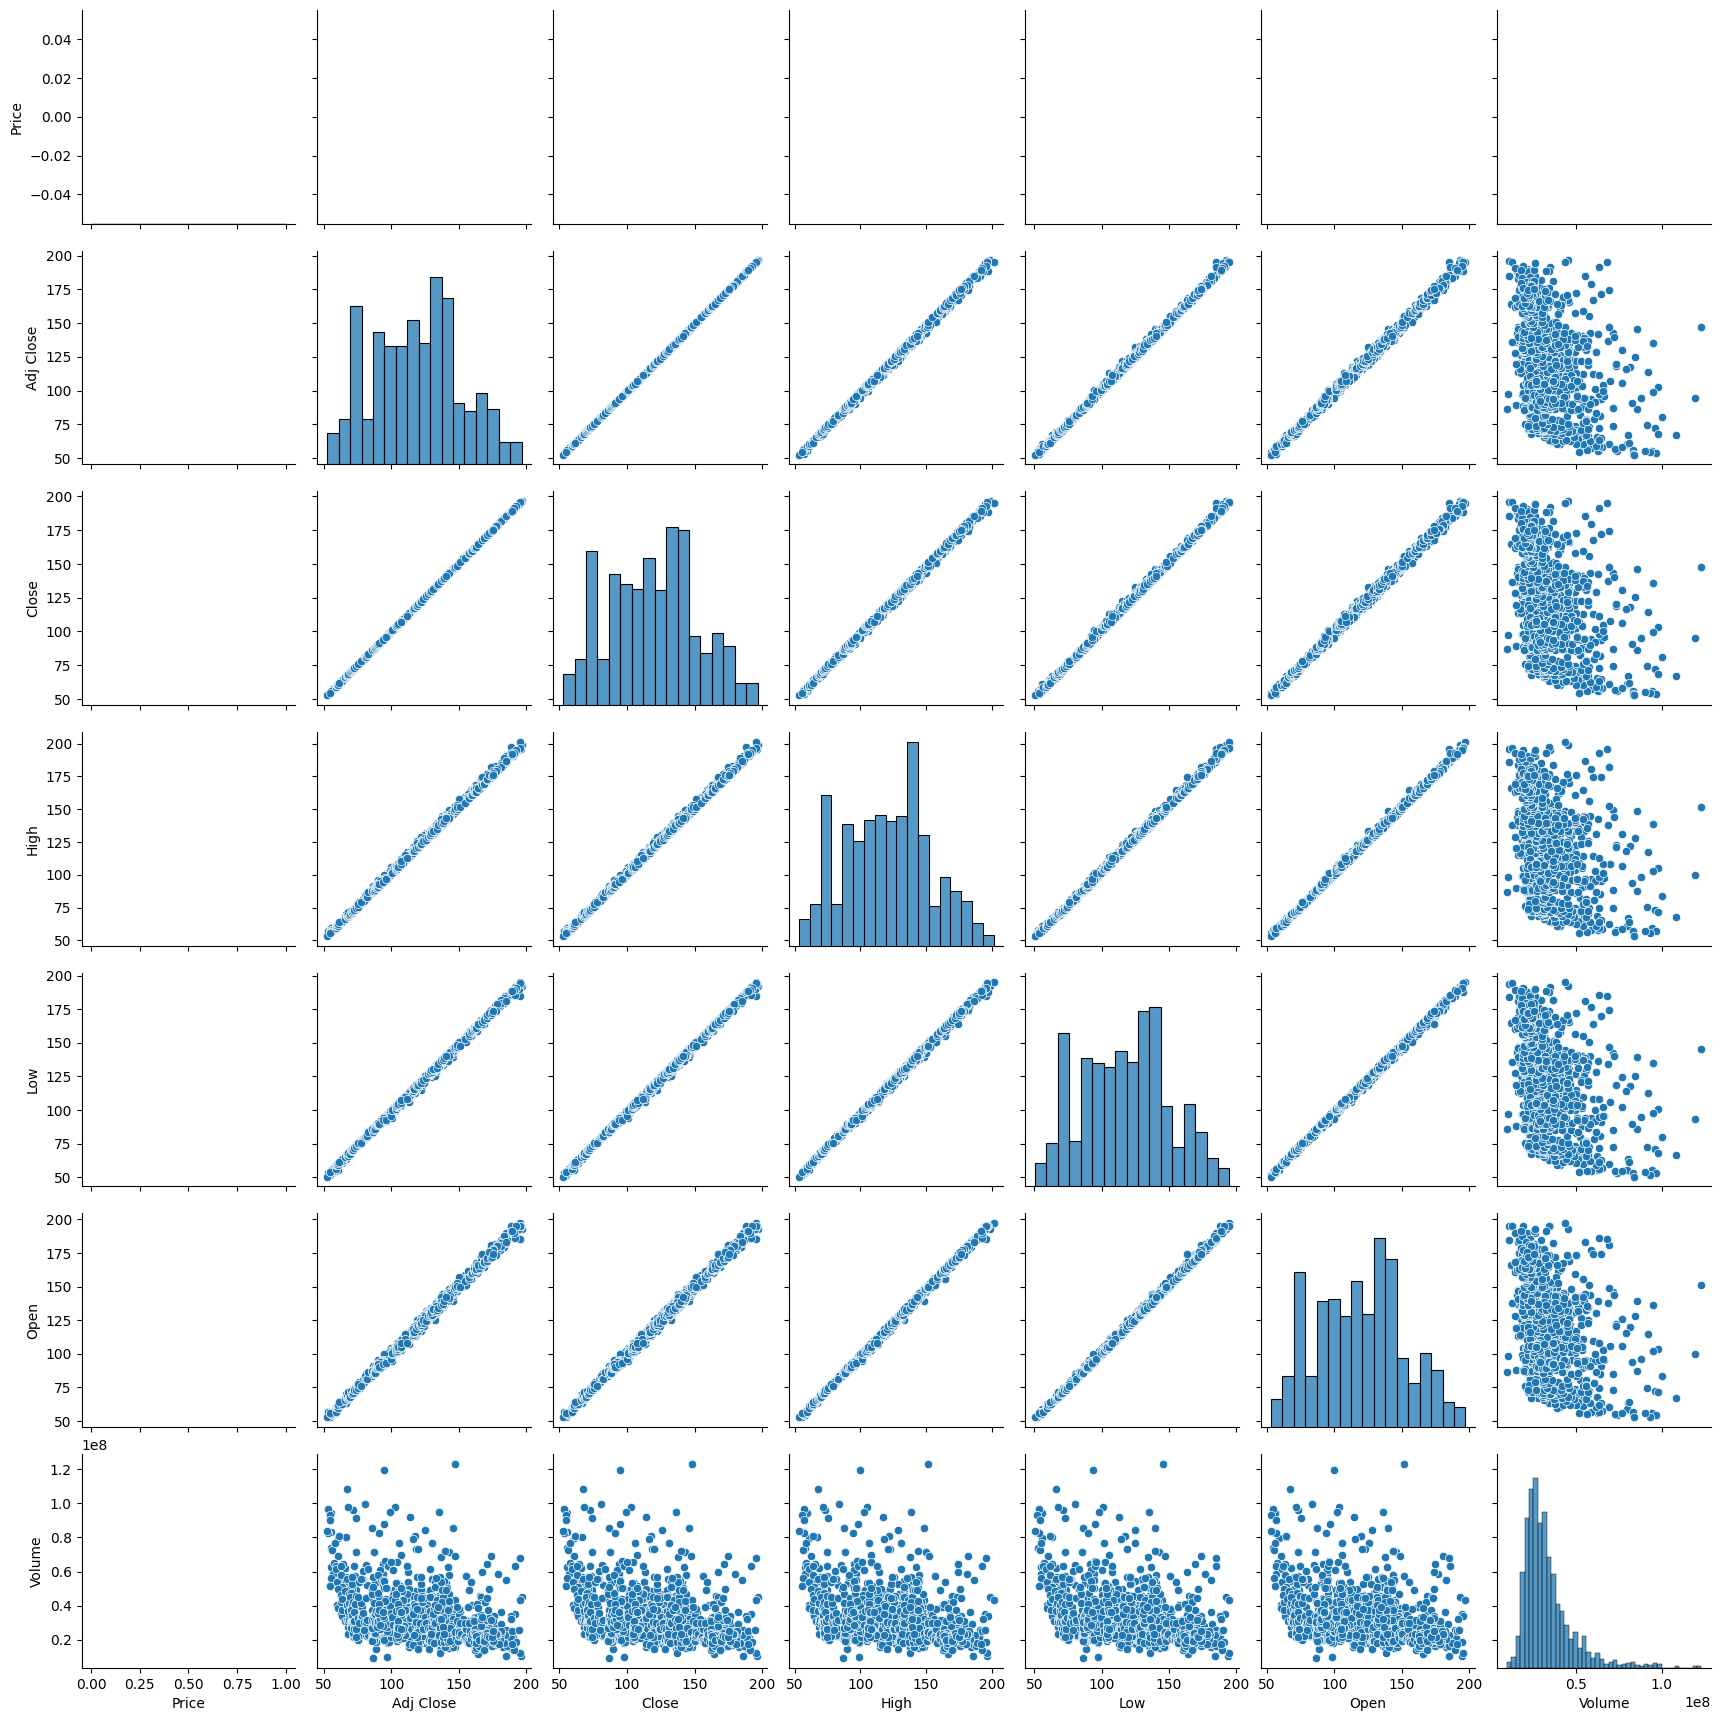

In [137]:
## rasme hame nemoodara 2 be 2 
## tahlile vabastegi behtar mide behemoon
sns.pairplot(Google_Stock_data[numric_coulmns])
plt.show

# Analysis of Google Stock Data Plots

This section provides a detailed analysis of the grid of plots representing various aspects of Google stock data (likely from `Google_Stock_data`), including histograms and scatter plots, and interprets the results.

## Description of the Plots

- **Layout**: The grid contains multiple subplots, each comparing two variables (e.g., Open, High, Low, Close, Adj Close, Volume) with histograms on the diagonal and scatter plots with regression lines elsewhere.  
- **Axes**:  
  - X-axis and Y-axis: Represent stock prices (e.g., Open, High, Low, Close, Adj Close) in dollars and volume (Volume) in units of 1e8 (likely 100 million).  
  - Scales vary per subplot, typically ranging from 0 to 200+ for prices and 0 to 1.2 for volume.  

- **Data Visualization**:  
  - **Histograms (Diagonal)**: Blue bars show the frequency distribution of individual variables (e.g., Open, Close). Most distributions are unimodal with peaks around 100–150.  
  - **Scatter Plots (Off-Diagonal)**: Blue dots represent data points, with a fitted regression line indicating trends. Dense clusters and positive slopes are common.  
  - **Volume Histogram**: The bottom-right plot shows a right-skewed distribution, with a peak near 0.2–0.4 and a long tail to 1.2, consistent with the earlier volume analysis.

## What It Represents

These plots visualize the relationships and distributions of Google stock (GOOGL) price metrics (Open, High, Low, Close, Adj Close) and trading volume from 2020 to 2025. The histograms reveal the frequency of price levels, while scatter plots with regression lines highlight correlations between these metrics.

## Results and Interpretation

- **Price Distributions (Histograms)**:  
  - Most price metrics (Open, High, Low, Close, Adj Close) peak around 100–150, indicating common trading ranges.  
  - The distributions are relatively symmetric, suggesting stable price behavior over time.  

- **Correlations (Scatter Plots)**:  
  - Strong positive correlations exist between Open vs. Close, High vs. Low, etc., as shown by the steep regression lines and dense data clusters.  
  - This implies that daily price movements are consistent, with opening and closing prices closely aligned.  

- **Volume Distribution**:  
  - The right-skewed volume histogram confirms that most trading days have low volumes (0.2–0.4), with rare high-volume days (above 1.0) likely tied to significant market events.  

- **Application**: These insights can guide trend analysis, volatility modeling, or identifying days with unusual trading activity.

## Conclusion

The plot grid effectively illustrates the distribution and interrelationships of Google stock prices and volume. Prices show stable, correlated behavior, while volume exhibits a skewed pattern with rare high-activity days. Further analysis could explore specific events driving volume spikes or price correlations.

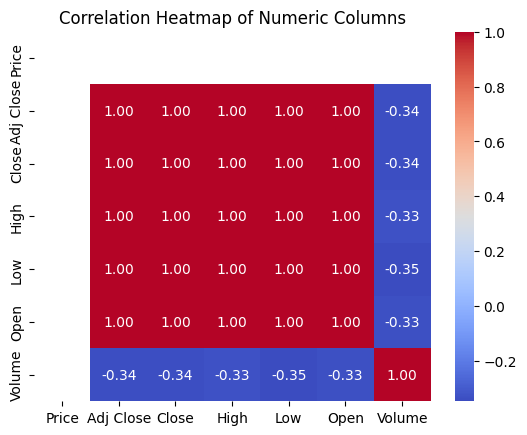

In [138]:
## sakhte dataframe shamele tmame dadehaye adadi
numeric_df = Google_Stock_data[numric_coulmns]
if numeric_df.shape[1]>4:
    plt.Figure(figsize=(15,14))
    corr = numeric_df.corr()
    sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Columns")
    plt.show()

# Analysis of Correlation Heatmap

This section analyzes the correlation heatmap of numeric columns from Google stock data. Current date and time: 04:57 PM BST, Tuesday, July 01, 2025.

## Heatmap Overview

- The heatmap shows relationships between numeric columns like Price, Adjusted Close, Close, High, Low, Open, and Volume.  
- Colors range from red (positive correlation up to 1.0) to blue (negative correlation down to -0.35).  

## Key Findings

- Price metrics (Adjusted Close, Close, High, Low, Open) have a perfect correlation (1.0), meaning they move together consistently.  
- Volume shows a weak negative correlation (-0.33 to -0.35) with price metrics, suggesting higher volumes might slightly lower prices, possibly due to sell-offs.  

## Interpretation

- The strong positive correlation among price metrics indicates they are derived from the same daily data.  
- The weak negative correlation with volume hints at minor market dynamics, like high-volume trading impacting prices.  
- This can help in understanding stock behavior or planning trading strategies.

## Conclusion

The heatmap highlights strong consistency among Google stock price metrics and a slight inverse relationship with volume. Further study could explore what drives these volume-price patterns.

C:\Users\User\AppData\Local\Temp\ipykernel_4148\4246812577.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




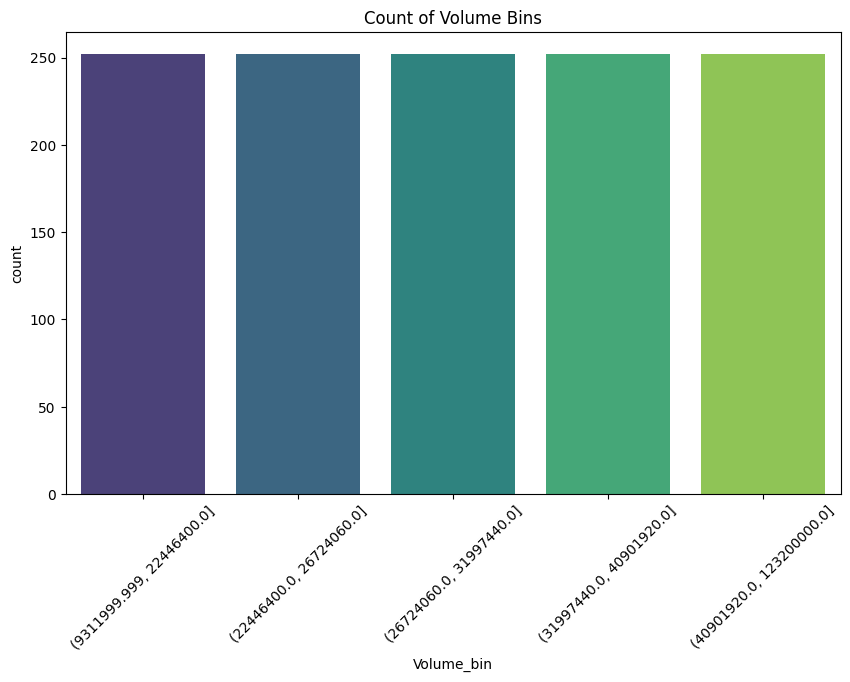

In [139]:
if Google_Stock_data['Volume'].nunique()>=5:
    try:
        Google_Stock_data['Volume_bin'] = pd.qcut(Google_Stock_data['Volume'],5,duplicates='drop')
    except Exception as e:
        print(f"an ERR accurred during binning:{e}")
        Google_Stock_data['Volume_bin'] = pd.cut(df['Volume'], bins=5)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Volume_bin', data=Google_Stock_data, palette='viridis')
    plt.title('Count of Volume Bins')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Not enough unique Volume values to create 5 bins.")

# Analysis of Volume Bins Bar Chart

This section analyzes the bar chart showing the count of volume bins for Google stock data (`Google_Stock_data`) and explains the underlying logic. Current date and time: 05:00 PM BST, Tuesday, July 01, 2025.

## Chart Overview

- **Axes**:  
  - X-axis: Volume bins, divided into five ranges: (931199.999, 2246400.0], (2246400.0, 2672400.0], (2672400.0, 3199740.0], (3199740.0, 4091920.0], and (4091920.0, 12320000.0].  
  - Y-axis: Count of occurrences, ranging from 0 to 250.  
- **Visualization**:  
  - The chart uses a gradient color scheme (viridis) with bars of equal height around 230–250, indicating a uniform distribution across the five bins.  

## What It Represents

This bar chart displays the frequency of trading volumes for Google stock, binned into five equal quantiles. The uniform height suggests that the volume data is evenly distributed across these ranges, likely due to the use of `pd.qcut` for quantile-based binning.

## Interpretation and Results

- **Uniform Distribution**: Each bin contains approximately 230–250 occurrences, showing that the volume data is well-balanced across the defined ranges.  
- **Range Insight**: The bins cover a wide range from about 931,200 to 12,320,000, reflecting the variability in trading volumes, with the highest bin extending to a significant upper limit.  
- **Application**: This uniformity can help in categorizing volume levels for further analysis, such as identifying typical vs. extreme trading days.

## Logic Explanation

- The code checks if the `Volume` column has at least 5 unique values.  
- If true, it attempts to bin the volume data into 5 quantiles using `pd.qcut`, with a fallback to `pd.cut` if an error occurs (e.g., due to duplicates).  
- A count plot is then generated using Seaborn, with a rotated x-axis for readability and a title for context.  
- If fewer than 5 unique values exist, it prints a message indicating insufficient data for binning.

## Conclusion

The bar chart confirms a balanced distribution of Google stock trading volumes across five bins. The underlying logic ensures robust binning and visualization, making it useful for segmenting volume data for deeper insights.

R² score of the Linear Regression model: 0.9994


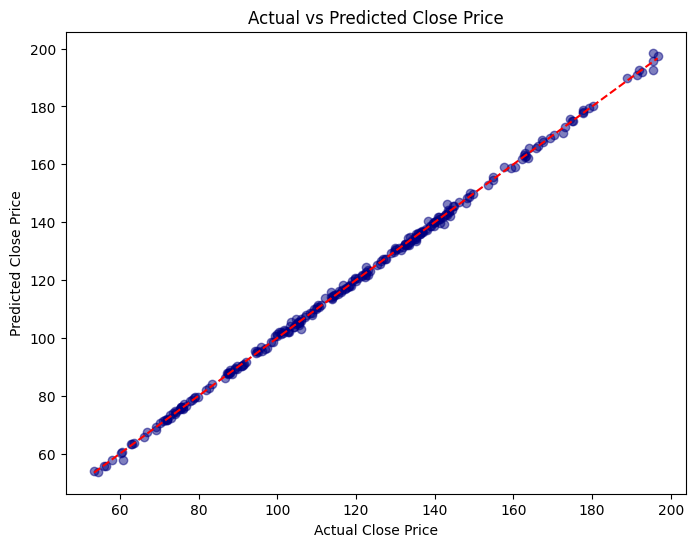

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features = ['Open','High','Low','Volume']
target = ['Close']

X = Google_Stock_data[features]
Y = Google_Stock_data[target]


X_tain,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_tain,Y_train)

Y_pred = lr.predict(X_test)

r2 = r2_score(Y_test,Y_pred)
print(f"R² score of the Linear Regression model: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='navy')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.show()

# Analysis of Actual vs Predicted Close Price Scatter Plot

This section analyzes the scatter plot comparing actual and predicted close prices of Google stock data (`Google_Stock_data`) based on a linear regression model. Current date and time: 05:02 PM BST, Tuesday, July 01, 2025.

## Plot Overview

- **Axes**:  
  - X-axis: Actual Close Price, ranging from 60 to 200.  
  - Y-axis: Predicted Close Price, also ranging from 60 to 200.  
- **Visualization**:  
  - Blue dots represent individual data points with some transparency (alpha=0.5).  
  - A red dashed line shows the ideal prediction line where actual equals predicted values.  

## What It Represents

This scatter plot illustrates the performance of a linear regression model trained on features (Open, High, Low, Volume) to predict the Close price of Google stock. The model was tested on 20% of the data, with the rest used for training.

## Interpretation and Results

- **Alignment with Ideal Line**: The data points closely follow the red dashed line, indicating strong agreement between actual and predicted values.  
- **R² Score**: The reported R² score of 0.9994 suggests the model explains 99.94% of the variance in the Close price, reflecting excellent predictive accuracy.  
- **Implication**: The tight clustering around the line shows the model effectively captures the relationship between the input features and the Close price, with minimal errors.

## Logic Insight

- The model uses a linear regression approach, splitting the data into training (80%) and test (20%) sets with a random state for reproducibility.  
- Features like Open, High, Low, and Volume are used to predict the Close price, and the R² score quantifies the model’s fit.  
- The plot visually confirms the high accuracy by comparing predictions against actual values.

## Conclusion

The scatter plot demonstrates that the linear regression model predicts Google stock Close prices with exceptional accuracy (R² = 0.9994). This suggests the model is highly reliable for this dataset, though further validation with new data could ensure robustness.